# Задача регрессии

В случае задач машинного обучения с учителем существует какое-то количество размеченных данных, данных, для которых определен корректный ответ и корректное предсказание. Мы пытаемся обучить нашу модель на этих данных и потом сделать предсказание на новых данных, которых мы еще не видели. Далее когда поступают новые данные, не размеченные, наша обученная модель пытается предсказать для них ответ.

В этом разделе мы посмотрим на одну из задач машинного обучения с учителем - это задача регрессии.

**Задача регрессии** (прогнозирования) – построение модели, способной предсказывать численную величину на основе набора признаков объекта.

**Регрессия. Постановка задачи.**

Есть обучающая выборка, в которой представлены объекты в виде из признакового описания (вектор признаков) и значения целевой переменной (непрерывная переменная).

Алгоритм регрессии дл каждого нового объекта (его признакового описания) прогнозирует значение целевой переменной.

**Ответ в задачах регресии является числовым из непрерывного диапазона, в отличии от задач классификации, где ответ дискретный.**

# Линейная регрессия

Самый простой способ посчитать регрессиию, предположить, что есть некая линейная зависимость от признаков.

$$f_{w,b}(x) = wx + b$$

In [76]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tqdm import tqdm

Мы ещё отдельно разберём как считать ошибки, но, упрощённо говоря, достаточно считать квадрат разности между настоящими и посчитанными значениями.

$$J(w,b) = \frac{1}{2m} \sum_{i=1}^{m}(f_{w,b}(x^{(i)}) - y^{(i)})^2$$

Подбирать параметры поможет градиентный спуск.

$$w \leftarrow w - \alpha \frac{\partial J}{\partial w}$$

$$b \leftarrow b - \alpha \frac{\partial J}{\partial b}$$

Для него нужно посчитать производные ошибки по параметрам.

$$
\frac{\partial J(w,b)}{\partial b} = \frac{1}{m} \sum_{i=0}^{m-1} (f_{w,b}(X^{(i)}) - y^{(i)})
$$

$$
\frac{\partial J(w,b)}{\partial w} = \frac{1}{m} \sum_{i=0}^{m-1} (f_{w,b}(X^{(i)}) - y^{(i)})X^{(i)}
$$

In [158]:
class LinearRegression():
    def __init__(self, learning_rate, iterations) :
        self.lr = learning_rate
        self.iterations = iterations
        self.W: np.ndarray = None
        self.bias: np.ndarray = None

    def _derivative(self, X: np.ndarray, Y: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
        """Calculate derivatives of weights and bias"""
        predictions = self(X)
        errors = predictions - Y
        dW = np.mean(errors * X, axis=0, keepdims=True).T
        db = np.mean(errors, axis=0)
        return dW, db

    def fit(self, X: np.ndarray, Y: np.ndarray, show_process=False):
        """
        Train (and initializer) linear regression model.

        X has shape (N, D), Y - (N, d).
        """
        _, D = X.shape
        _, d = Y.reshape(-1, 1).shape
        if self.W is None:
            self.W = np.zeros((D, d))
        if self.bias is None:
            self.bias = np.zeros(d)

        pbar = tqdm(range(self.iterations), disable=not show_process)
        loss_history = []
        for i in pbar:
            dW, db = self._derivative(X, Y.reshape(-1, 1))
            self.W -= self.lr * dW
            self.bias -= self.lr * db
            if show_process:
                mse = np.mean((self(X) - Y.reshape(-1, 1))**2)
                loss_history.append(mse)
                pbar.set_description(f"Training")
                pbar.set_postfix(
                    Iter=f"{i+1}/{self.iterations}",
                    MSE=f"{mse:.6f}",
                    LR=f"{self.lr:.6f}"
                )
        return loss_history

    def predict(self, X) :
        return X @ self.W + self.bias
    
    def __call__(self, X):
        """Just an alias for .predict"""
        return self.predict(X)

Training: 100%|██████████| 10000/10000 [00:10<00:00, 976.96it/s, Iter=10000/10000, LR=0.001000, MSE=38619775.812990]


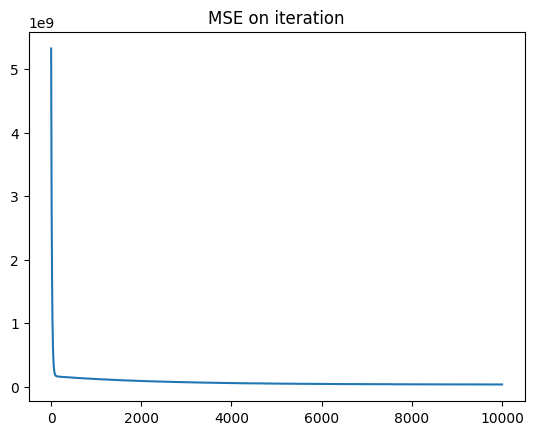

In [162]:
df = pd.read_csv( "salary_data.csv" )

X = df.iloc[:,:-1].values
Y = df.iloc[:,1].values
# N = 20
# X = np.linspace(0, 50, N) + np.random.rand(N)
# Y = np.linspace(10, 30, N) + np.random.rand(N)
# X = X.reshape(-1, 1)
# Y = Y.reshape(-1, 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/3, random_state = 0 )
iters = 10000
model = LinearRegression(iterations = iters, learning_rate = 0.001)
losses = model.fit(X_train, Y_train, show_process=True)

plt.title("MSE on iteration")
plt.plot(np.arange(1, iters + 1), losses)
plt.show()

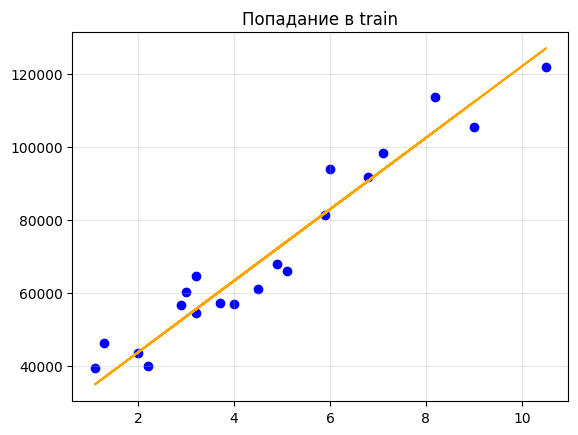

In [163]:
Y_pred = model.predict(X_train)

plt.scatter(X_train, Y_train, color = 'blue')
plt.grid(alpha=0.3)
plt.plot(X_train, Y_pred, color = 'orange')
plt.title('Попадание в train')
plt.show()

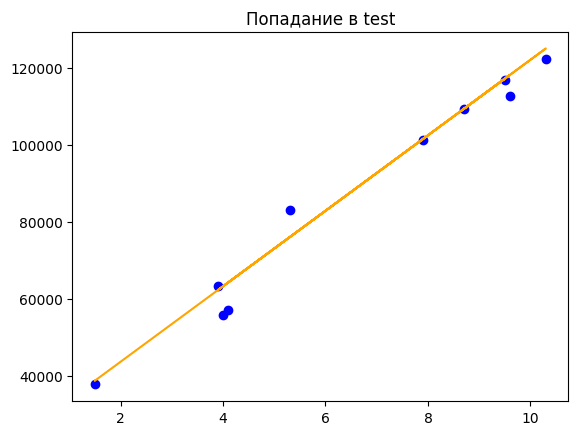

In [164]:
Y_pred = model.predict(X_test)

plt.scatter(X_test, Y_test, color = 'blue')
plt.plot(X_test, Y_pred, color = 'orange')
plt.title('Попадание в test')
plt.show()